In [2]:
import re
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np

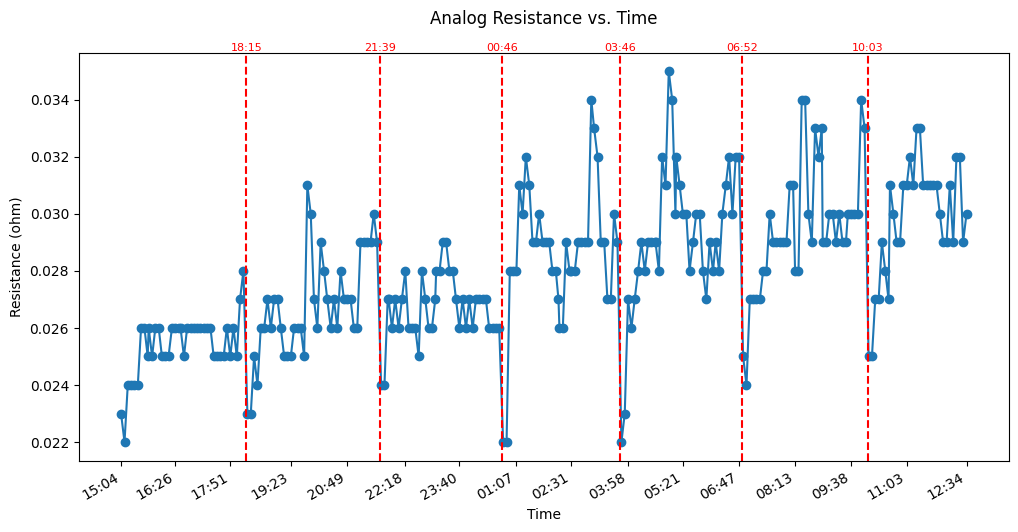

In [3]:
#open file
with open('/nfshome/natpenn/Desktop/wafer_NC0W14-05A4/20240607_150356/wafer_NC0W14-05A4_20240607_150356.log', 'r') as file:
    log_content = file.readlines()

pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*Contact resistance \(analog\): (\d+\.\d+) ohm'
time_pattern = r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2},\d{3}).*Performing periodic cleaning of the needles'

#search for contact resistance values and times
timestamps = []
resistances = []
for line in log_content:
    match = re.search(pattern, line)
    if match:
        timestamp = match.group(1)
        resistance = float(match.group(2))  # Convert resistance to float
        timestamps.append(timestamp)
        resistances.append(resistance)

#search for cleaning times        
times = []
for i in log_content:
    good = re.search(time_pattern, i)
    if good:
        time = good.group(1)
        times.append(time)

#Set dates
dates = [datetime.strptime(f'{ts}', '%Y-%m-%d %H:%M:%S,%f') for ts in timestamps]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates, resistances, marker='o', linestyle='-')

# Add vertical lines for each time in the times list
for time in times:
    time_dt = datetime.strptime(f'{time}', '%Y-%m-%d %H:%M:%S,%f')
    hour_minute = time_dt.strftime('%H:%M')
    plt.axvline(x=time_dt, color='r', linestyle='--')
    plt.text(time_dt, plt.gca().get_ylim()[1], hour_minute, ha='center', va='bottom', color='r', fontsize=8)

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gcf().autofmt_xdate()

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Resistance (ohm)')
plt.title('Analog Resistance vs. Time', y=1.05)

# Get 16 evenly spaced indices from the dates list
indices = np.linspace(0, len(dates) - 1, num=16, dtype=int)

# Use the indices to get the corresponding dates and set them as tick locations and labels
plt.xticks([dates[i] for i in indices], [dates[i].strftime('%H:%M') for i in indices])

# Show plot
plt.show()